# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set()
sns.set_context('paper',font_scale=2)



In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/phyhouhou/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


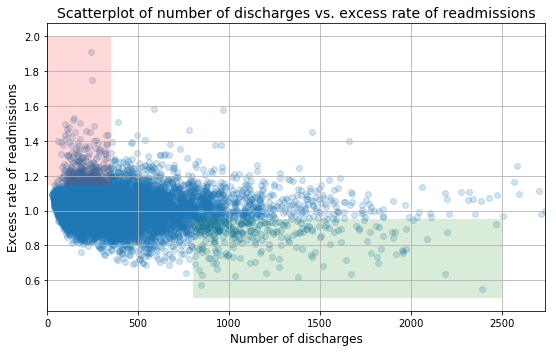

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Further analysis

## Do you agree with the above analysis and recommendations? Why or why not?

The initial observations are based on the scatterplot of number of discharges and excess rate of readmissions, which gives some hints but is neither clear nor complete about the correlation between rate of readmissions and number of discharges. The red shaded area could imply some trend but also could be due to outliers or other features. Furthermore, 'Number of discharge' below 1000 is like a data jam, why? Is it due to missing features? Although the preliminary analysis handled missing values in 'Number of Discharges' but there are still missing values in 'Excess Readmission Ratio'. More careful analysis is needed.

Concerning statistics, the analysis discussed about hospitals/facilities with number of discharges < 100 and with number of discharges > 1000 but say nothing about the intermediate range. It's not quite clear what range 'small' and 'large' refer to. The analysis shows the summary statistics about the sample such as the mean and portion but not give confidence interval or other inferential statistic analysis so it's only about the sample itself might not necessarily generatable to a larger population. In addition, mean excess readmission rate and the portion that have excess readmission rate greater than 1 are not necessarily a good metric, for instance in case of outliers, the mean can be quite different from the median. More careful EDA is needed.

The preliminary anslysis concluded that there is a significant correlation between hospital capacity (number of discharges) and readmission rate. But it didn't calculate the correlation coefficent or any significance value.  A careful hypothesis testing of whether hospitals/facilties with small capacity have significantly different excess readmission rate from hospitals/facilities with large capacity is needed before drawing conclusions. 

Therefore the conclusion might turn out true but further analysis is needed to consolidate the conclusion.

## Exploratory data analysis

### Raw data

The summary description below shows that there are 16860 observations (staring from 07/01/2010 till 06/30/2013) by 5 'Measure Name' for 3250 unique hospitals in 51 states on 12 features. The feature 'Number of Discahrges' although has no missing values but is not 'int' type as around 1/3 of its values is 'Not Available'; Then for features 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', around 1/5 of its values are missing (3129); 'Number of Readmissions' has around 1/3 missing values. 

In [5]:
hospital_read_df.info()
hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [6]:
hospital_read_df.select_dtypes(include='object').describe()

,Hospital Name,State,Measure Name,Number of Discharges,Start Date,End Date
count,16860,16860,16860,16860,16860,16860
unique,3250,51,5,1295,1,1
top,MEMORIAL HOSPITAL,TX,READM-30-COPD-HRRP,Not Available,07/01/2010,06/30/2013
freq,35,1565,3372,5282,16860,16860


In [7]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [8]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

### Dealing with missing values

In [9]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [10]:
df=clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

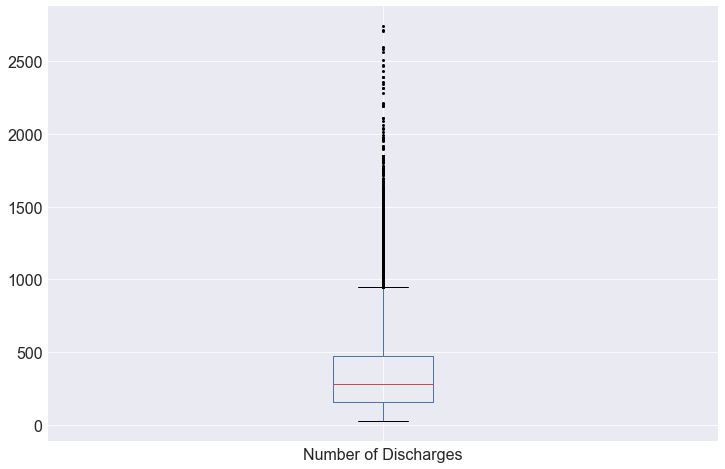

In [42]:
df[['Number of Discharges']].boxplot(sym='k.',figsize=(12,8),grid=True);

Remove the last 3 outliers in 'Number of Discharges'

In [14]:
df=df[:-3]

## Correlations

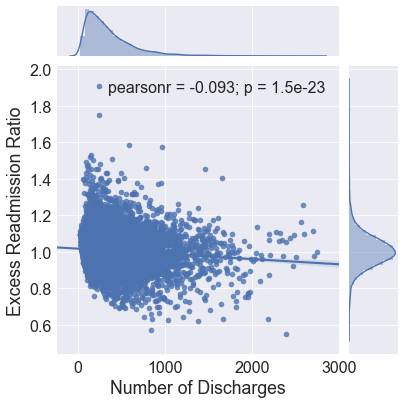

In [18]:
sns.jointplot(x=df["Number of Discharges"], y=df["Excess Readmission Ratio"], kind='reg');

The figure shows that 'Number of Discharges' has a negative correlation with 'Excess Readmission Ratio' with the coefficience being -0.093. It is significantly different from 0, so we reject the null hypothesis that there is no correlaton between 'Number of Discharges' and 'Excess Readmission Ratio'. On the other hand, notice that it catches only around 10% of variance of the 'Excess Readmission Ratio'.

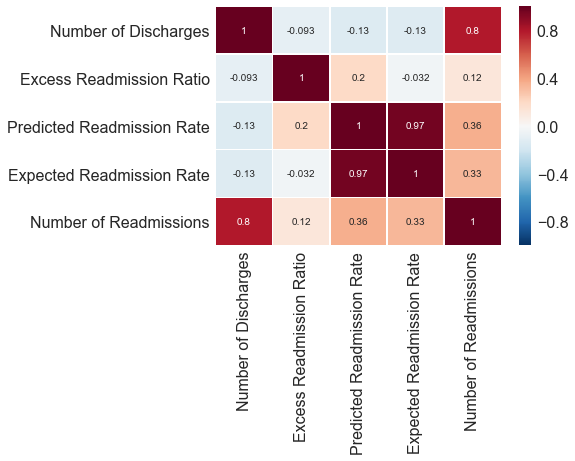

In [15]:
cols=['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']
corr=df[cols].corr(method='pearson')
sns.heatmap(corr,annot=True,linewidths=0.4,annot_kws={'size':10});

The correlation matrix shows that 'Number of Discharges' and 'Excess Readmission Ratio' are both strongly correlated with 'Number of Readmissions'. 

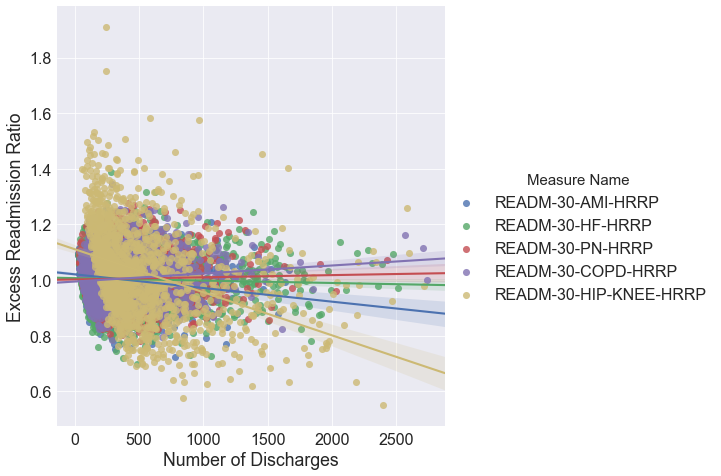

In [57]:
#plt.figure(figsize=(20,10))
sns.lmplot( x='Number of Discharges', y='Excess Readmission Ratio', data=df,
           fit_reg=True, hue='Measure Name',legend=True, 
          size=7, truncate=False, scatter_kws={"s": 50});



We find that if visualized by 'Measure Name', the trend can be quite different from negative to positive. So in summary it's suggested to do more careful thinking about relevant features. 

# Statistics

We divide the observations into two groups: 'large' and 'small' following the preliminary analysis. 'large' means 'Number of Discharges' below its median and 'small' means 'Number of Discharges' above its median. We will perform hypothesis testing to test if distributions of'Excess Readmission Ratio' of the two groups are significantly different. 

In [104]:
threshold=df['Number of Discharges'].median()

df_small = df[df['Number of Discharges'] < threshold]
df_large = df[df['Number of Discharges'] >= threshold]

dfls=pd.concat([df_small,df_large],axis=0)
dfls['size']=np.where(dfls['Number of Discharges'] > threshold,'large','small')
#dfls.sample(5)

## Visualize the two groups

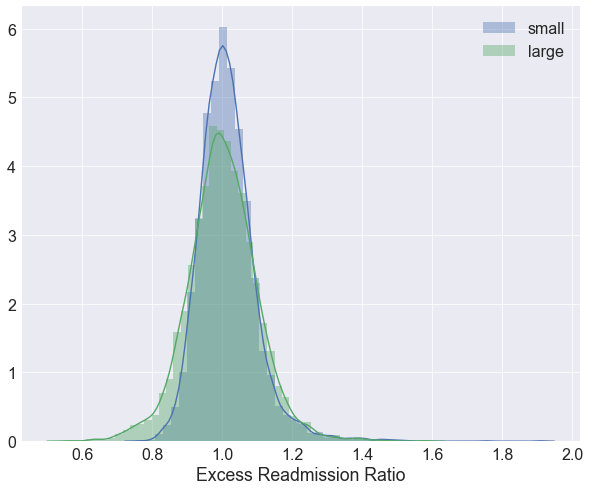

In [105]:
plt.figure(figsize=(10,8))

sns.distplot(df_small['Excess Readmission Ratio'],norm_hist=True)
sns.distplot(df_large['Excess Readmission Ratio'],norm_hist=True)
plt.legend(('small','large'),loc='best')
plt.xlabel('Excess Readmission Ratio');

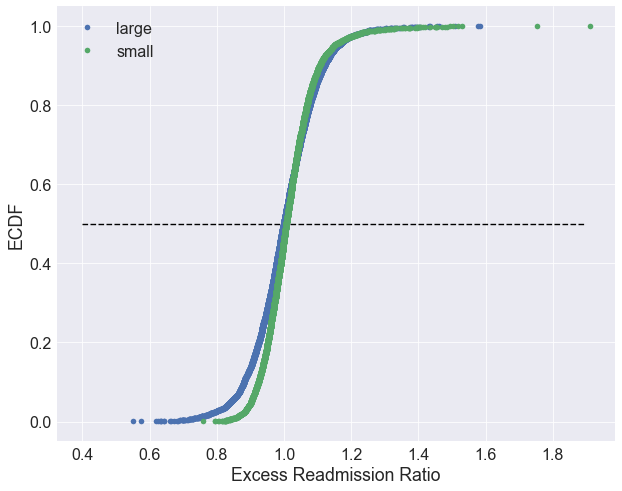

In [106]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

plt.figure(figsize=(10,8))
x_l,y_l=ecdf(df_large['Excess Readmission Ratio'])
plt.plot(x_l,y_l,marker='o',linestyle='none')


x_s,y_s=ecdf(df_small['Excess Readmission Ratio'])
plt.plot(x_s,y_s,marker='o',linestyle='none')

plt.hlines(0.5, 0.4,1.9,linestyle='--')

plt.xlabel('Excess Readmission Ratio')
plt.ylabel('ECDF')
plt.legend(('large','small'),loc='best');

Both the histogram and ECDF plot shows that 'large' hospitals tend to have wider distribution and have smaller average 'Excess Readmission Ratio'.

## Hypothesis testing 

The observations are separated into two groups depending on whether the 'Number of Discharges' is below or above its median. We have calcuated that there is a statistically significant correlation between 'Number of Discharges' and 'Excess Readmission Ratio'. We want to test if the 'Excess Readmission Ratio' of the two groups are significantly different in distribution.

In [107]:

def diff_of_means(data_1, data_2):
    diff = np.mean(data_1)-np.mean(data_2)
    return diff

empirical_diff_means =diff_of_means(df_small['Excess Readmission Ratio'],df_large['Excess Readmission Ratio'])

df_concat =np.concatenate((df_small['Excess Readmission Ratio'],df_large['Excess Readmission Ratio']))

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_sample = np.random.choice(df_concat, size=len(df_concat))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(df_small['Excess Readmission Ratio'])],
                                     bs_sample[len(df_small['Excess Readmission Ratio']):])

p = np.sum(empirical_diff_means<=bs_replicates) / 10000
print('difference in mean: ',empirical_diff_means)
print('p-value =', p)


difference in mean:  0.013683746144021569
p-value = 0.0


The observed difference in the mean of two groups is 0.014 (small hospitals have a greater mean ERR) with p-value being 0. So our result remains statistically significant for $\alpha$ = 0.01. Therefore, we reject the null hypothesis and conclude there is a statistically significant difference in the 'Excess Readmission Ratio' for hospitals with large or small capacity.

## Correlation for each group

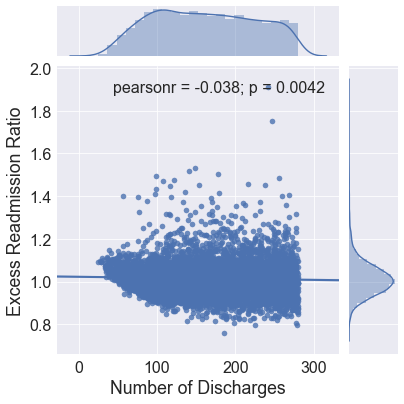

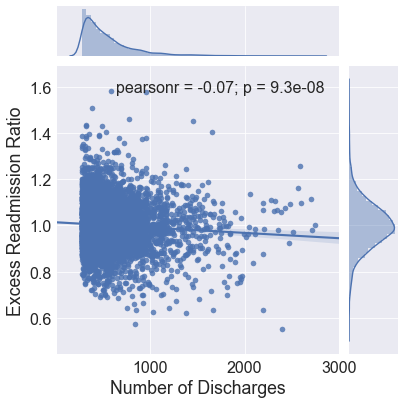

In [110]:
sns.jointplot(x=df_small["Number of Discharges"], y=df_small["Excess Readmission Ratio"], kind="reg");#'scatter'

sns.jointplot(x=df_large["Number of Discharges"], y=df_large["Excess Readmission Ratio"], kind='reg');



For hospitals with small 'Number of Discharges', the pearson correlation is -0.038 and for 'large' hospitals it is -0.07.

# Conclusions

## Statistical significance and practical significance

According to my statistic analysis, there is significant difference in the 'Excess Readmission Ratio' (ERR) beween hospitals with large 'Number of discharge' (greater than or equal to its median) and hospitals with small 'Number of discharge' (smaller than its median). The difference in average ERR between the two groups is 0.014. It is statistically significant but since it is a small number, I wouldn't say it is practically significant. In addition considering the individual pearson correlation for both groups, both are not high indicating a weak correlation. It might worth investigating correlations of ERR with other features.

## A better scatter plot

The scatterplot in preliminary analysis gives an overview about how the two features look like. But it is not clear 
what kind of relationship it is between two features. The preliminary anslysis discusses about two groups but those two groups are not distinguished in its scatterplot. To construct a better scatterplot, I distinguish two groups and add regression lines for both as shown below.

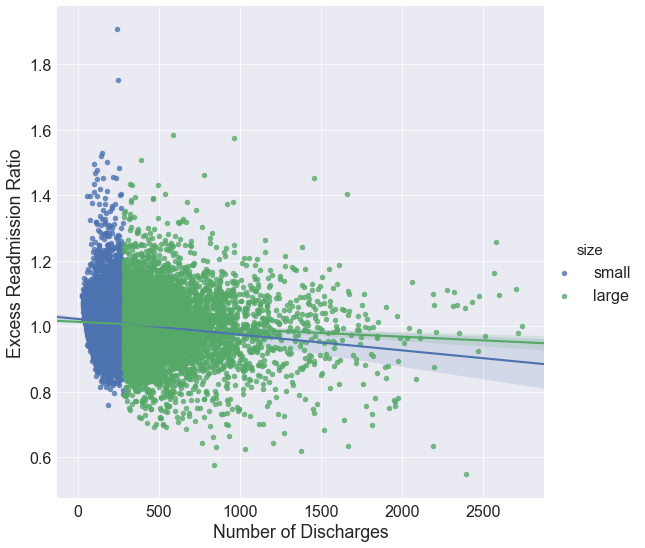

In [103]:
sns.lmplot( x='Number of Discharges', y='Excess Readmission Ratio', data=dfls,
           fit_reg=True, hue='size',legend=True, 
          size=8, truncate=False, scatter_kws={"s": 30});